## Лабораторная 4: восстановление плотности распределения

Данными в этом задании являются измерения некоторых проверочных параметров на конвейерах  сборки оборудования Bosh (см. [конкурс](https://www.kaggle.com/c/bosch-production-line-performance) «Bosch Production Line Performance» на Kaggle). 

Все исходные данные Bosh не помещаются в оперативную память компьютера, поэтому в файле `data.csv` — лишь некоторые признаки. Прочтите данные из файла `data.csv`. Целевым признаком здесь является `Response` — наличие брака в оборудовании. 

In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_csv('data.csv')

In [4]:
dataframe.head(30)

,L1_S24_F1844,L1_S24_F1846,Response
0,-0.123,0.111,0
1,-0.269,0.175,0
2,-0.058,0.141,0
3,0.136,-0.145,0
4,0.045,-0.094,0
5,-0.152,0.181,0
6,0.233,0.045,0
7,0.327,-0.193,0
8,-0.020,-0.097,0
9,-0.029,0.122,0


## 1 
Постройте на одном графике два приближения к плотности распределения признака `L1_S24_F1846` для `Response = 0` и для `Response = 1`, используя одно из следующих ядер (номер ядра выберите по формуле: `(n mod 6) + 1`, где `n` — ваш номер в списке группы):

    1.	кусочно-постоянное (прямоугольное) -  tophat
    2.	гауссовское -  gaussian
    3.	линейное (треугольник) -  linear
    4.	косинусоидальное -  cosine
    5.	квадратичное (Епанечникова) -  epanechnikov
    6.	экспоненциальное -  exponential


In [5]:
# Ядро номер 4 - cosine

In [6]:
from sklearn.neighbors import KernelDensity
import numpy as np

import matplotlib.pyplot as plt

*Help:*

    i0 = data['Response'] == 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
    X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
    Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples возвращает логарифм плотности

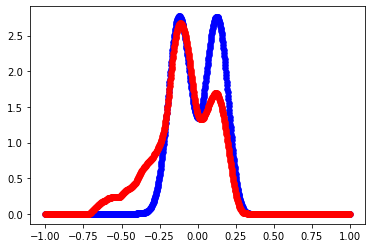

In [7]:
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)

kde0 = KernelDensity(kernel='cosine', bandwidth=0.1).fit(dataframe.loc[dataframe['Response'] == 0, 'L1_S24_F1846'].values.reshape(-1, 1))
Dens0 = np.exp(kde0.score_samples(X_plot))
kde1 = KernelDensity(kernel='cosine', bandwidth=0.1).fit(dataframe.loc[dataframe['Response'] == 1, 'L1_S24_F1846'].values.reshape(-1, 1))
Dens1 = np.exp(kde1.score_samples(X_plot))

figure, ax = plt.subplots()
ax.scatter(X_plot, Dens0, s=30, c = "b")
ax.scatter(X_plot, Dens1, s=30, c = "r")
plt.show()

Ответьте в комментариях на вопрос: является ли выборка хорошо разделимой по признаку  `L1_S24_F1846`?

In [8]:

# Я считаю, что не является, так как графики в случае этого признака практически совпадают, 
# применив признак L1_S24_F1844 разделение получается более явным

## 2

Разбейте выборку `data` на две равные части: тренировочную `dataTrain` и проверочную `dataTest`. 

In [9]:
dataTrain = dataframe.loc[0:dataframe.shape[0] / 2, ].reset_index(drop=True)
dataTest = dataframe.loc[dataframe.shape[0] / 2:dataframe.shape[0], ].reset_index(drop=True)

Пользуясь кросс-валидацией, подберите **для каждого класса `Response` (`r=0` и `r=1`)** значение ширины ядра `bandwidth`, при котором логарифм правдоподобия максимален на проверочной выборке.

*Help:*

    r = 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()
    print(logLikehood0)

In [20]:
r = 0
kde0 = KernelDensity(kernel='cosine', bandwidth=0.05)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
logLikehood0 = logProbability0.sum()
print(logLikehood0)

22014.938082574587


In [21]:
r = 1
kde1 = KernelDensity(kernel='cosine', bandwidth=0.05)
kde1.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1[np.isinf(logProbability1)] = -100 # заменяем -бесконечность
logLikehood1 = logProbability1.sum()
print(logLikehood1)

114.50762919404988


In [12]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {'bandwidth': np.linspace(0, 1, 20)}
grid0 = GridSearchCV(KernelDensity(kernel='cosine'), params)
grid0.fit(dataTrain.loc[dataTrain['Response']==0, 'L1_S24_F1846'].values.reshape(-1, 1))

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='cosine',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
grid0.best_params_

{'bandwidth': 0.05263157894736842}

In [19]:
r = 0
kde0 = KernelDensity(kernel='cosine', bandwidth=0.05263157894736842)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
logLikehood0 = logProbability0.sum()
print(logLikehood0)

22018.63166629551


In [22]:
grid1 = GridSearchCV(KernelDensity(kernel='cosine'), params)
grid1.fit(dataTrain.loc[dataTrain['Response']==1, 'L1_S24_F1846'].values.reshape(-1, 1))

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='cosine',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
grid1.best_params_

{'bandwidth': 0.05263157894736842}

In [24]:
r = 1
kde1 = KernelDensity(kernel='cosine', bandwidth=0.05263157894736842)
kde1.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1[np.isinf(logProbability1)] = -100 # заменяем -бесконечность
logLikehood1 = logProbability1.sum()
print(logLikehood1)

114.39765891145784


In [29]:
# Скорее всего при большей последовательности чисел длч ширины возможно было бы найти еще более полдходящее значение, но это потребует еще бошьшего времени выполнения кроссвалидации

### 3

Для найденных наилучших `bandwidth` вычислите `p(x|0)` и `p(x|1)` для тестовой выборки. 

In [25]:
predictionProbXafter0 = np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
predictionProbXafter1 = np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))

По формуле Байеса найдите затем `p(0|x)` и `p(1|x)`. Отсортируйте все объекты тестовой выборки по возрастанию предсказанной вероятности `p(1|x)`, выведите на экран вероятности для последних 10 объектов и рассчитайте количество бракованных деталей среди последних 100 объектов в отсортированном ряду.

*Help:*
    
    ind = np.argsort(predictionProb1afterX) - сортировка, возвращающая индексы элементов
    print(predictionProb1afterX[ind[-10:]]) - вывод последних 10 элементов
    print(sum(dataTest.loc[ind[-100:],'Response'])) - количество бракованных среди 100 с максимальной вероятностью брака

In [26]:
Prob0afterX = np.sum(dataframe['Response']==0) / dataframe.shape[0]
Prob1afterX = np.sum(dataframe['Response']==1) / dataframe.shape[0]
ProbAll = predictionProbXafter0 * Prob0afterX + predictionProbXafter1 * Prob1afterX
predictionProb1afterX = predictionProbXafter1 * Prob1afterX / ProbAll

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [28]:
ind = np.argsort(predictionProb1afterX) 
print(predictionProb1afterX[ind[-10:]]) 
print(sum(dataTest.loc[ind[-100:],'Response']), '- количество бракованных среди 100 с максимальной вероятностью брака') 

[0.61517046 0.61517046 0.61565619 0.61667664 0.61667664 0.61966627
 0.63834043 0.67367616 0.67367616        nan]
29 - количество бракованных среди 100 с максимальной вероятностью брака
